# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

In [1]:
# using most recent CSV files from 2021-02-10

<img src="assets/bricks.jpg">

# Import Statements

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

<img src="assets/rebrickable_schema.png">

In [5]:
# using only the highlighted tables
colors_df = pd.read_csv("data/colors_20210210.csv", header=0, names=["id", "name", "rgb", "is_trans"])

# prepared for later use
# sets_df = pd.read_csv("data/sets_20210210.csv", header=0, names=["set_num", "name", "year", "theme_id", "num_parts"])
# themes_df = pd.read_csv("data/themes_20210210.csv", header=0, names=["id", "name", "parent_id"])

In [6]:
# make sure the dataframe was loaded properly
colors_df.describe()

,id
count,186.000000
mean,466.897849
std,825.053266
min,-1.000000
25%,60.250000
50%,178.500000
75%,1012.750000
max,9999.000000


In [11]:
colors_df.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [12]:
colors_df["name"].nunique()

186

In [14]:
# should be colors that have a transparent variant too counted twice?
colors_df["rgb"].nunique()

160

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [16]:
# count transparent and opaque colors
colors_df.groupby(["is_trans"]).count()

,id,name,rgb
is_trans,,,
f,151,151,151
t,35,35,35


In [17]:
# alternatively
colors_df["is_trans"].value_counts()

f    151
t     35
Name: is_trans, dtype: int64

**Challenge**: Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets

### Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

<img src="assets/lego_themes.png">

### A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png 

<img src="assets/lego_sets.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [18]:
sets_df = pd.read_csv("data/sets_20210210.csv", header=0, names=["set_num", "name", "year", "theme_id", "num_parts"])

In [19]:
# confirm import
sets_df.describe()

,year,theme_id,num_parts
count,16448.000000,16448.000000,16448.000000
mean,2005.112901,391.444553,163.875912
std,13.987155,201.039303,377.741904
min,1949.000000,1.000000,0.000000
25%,1999.000000,227.000000,8.000000
50%,2009.000000,447.000000,42.000000
75%,2016.000000,524.000000,160.000000
max,2021.000000,712.000000,9987.000000


In [20]:
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [21]:
sets_df.tail()

,set_num,name,year,theme_id,num_parts
16443,XWING-1,Mini X-Wing Fighter,2019,158,60
16444,XWING-2,X-Wing Trench Run,2019,158,52
16445,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413
16446,YTERRIER-1,Yorkshire Terrier,2018,598,0
16447,ZX8000-1,ZX 8000 LEGO Sneaker,2020,501,0


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [22]:
sets_df["year"].min()

1949

In [25]:
sets_df.sort_values("year").head()

,set_num,name,year,theme_id,num_parts
9959,700.2-1,Large Gift Set (ABB),1949,365,178
9964,700.3-1,Medium Gift Set (ABB),1949,365,142
9946,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9970,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9969,700.A-1,Small Brick Set (ABB),1949,371,24


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [27]:
# filter the df by a condition
sets_df[sets_df["year"] == 1949]

,set_num,name,year,theme_id,num_parts
9946,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9959,700.2-1,Large Gift Set (ABB),1949,365,178
9964,700.3-1,Medium Gift Set (ABB),1949,365,142
9969,700.A-1,Small Brick Set (ABB),1949,371,24
9970,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [28]:
sets_df.sort_values("num_parts", ascending=False).head()

,set_num,name,year,theme_id,num_parts
15668,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
318,10276-1,Colosseum,2020,673,9036
11666,75192-1,UCS Millennium Falcon,2017,171,7541
10993,71043-1,Hogwarts Castle,2018,246,6020
296,10256-1,Taj Mahal,2017,673,5923


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [32]:
sets_df.groupby("year").count()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,801,801,801,801
2018,834,834,834,834
2019,882,882,882,882


In [34]:
sets_df[sets_df["year"] == 1955].count()

set_num      28
name         28
year         28
theme_id     28
num_parts    28
dtype: int64

In [35]:
sets_df[sets_df["year"] == 2019].count()

set_num      882
name         882
year         882
theme_id     882
num_parts    882
dtype: int64

In [36]:
# also 2020, for completeness' sake
sets_df[sets_df["year"] == 2020].count()

set_num      826
name         826
year         826
theme_id     826
num_parts    826
dtype: int64

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

In [39]:
# save the above into a new df 
sets_by_year_df = sets_df.groupby("year").count()
sets_by_year_df["set_num"].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

In [40]:
sets_by_year_df["set_num"].tail()

year
2017    801
2018    834
2019    882
2020    826
2021    331
Name: set_num, dtype: int64

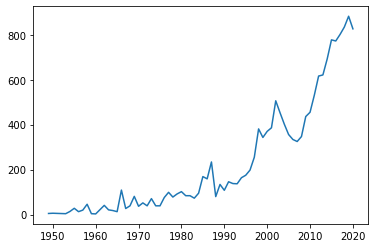

In [41]:
# don't include the year 2021, as it's not over yet
plt.plot(sets_by_year_df.index[:-1], sets_by_year_df["set_num"][:-1])

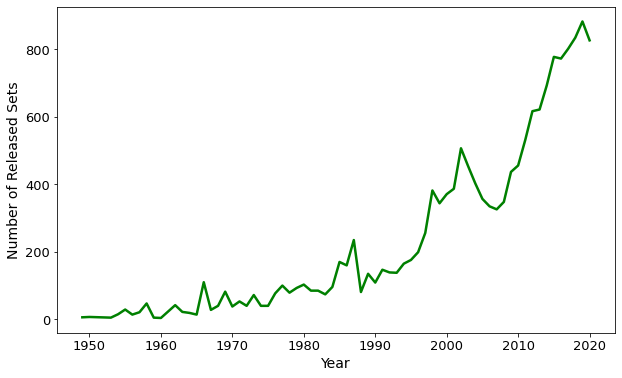

In [48]:
# a little prettier
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=13)
plt.xlabel("Year", fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Number of Released Sets", fontsize=14)
plt.plot(sets_by_year_df.index[:-1], sets_by_year_df["set_num"][:-1], color="green", linewidth=2.5)

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [52]:
# using the full dataframe
themes_by_year_df = sets_df.groupby("year").agg({"theme_id": pd.Series.nunique})

In [53]:
# rename columns
themes_by_year_df.rename(columns={"theme_id": "nr_themes"}, inplace =True)

In [54]:
themes_by_year_df.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

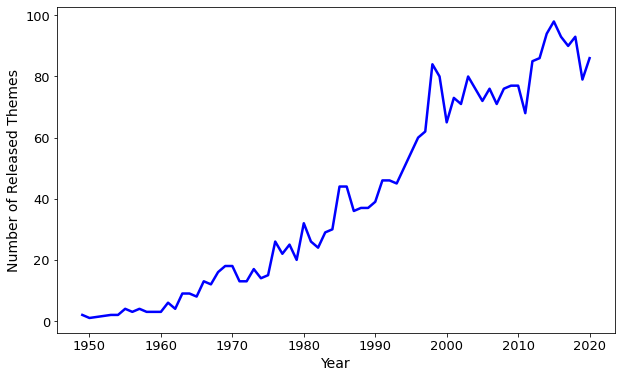

In [57]:
# again, skipping data for 2021
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=13)
plt.xlabel("Year", fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Number of Released Themes", fontsize=14)
plt.plot(themes_by_year_df.index[:-1], themes_by_year_df["nr_themes"][:-1], color="blue", linewidth=2.5)

### Line Charts with Two Seperate Axes

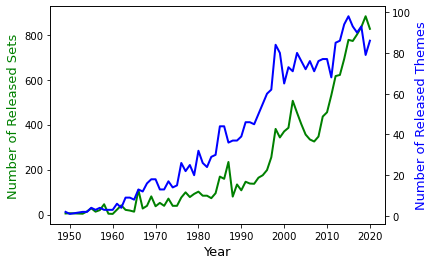

In [80]:
# to share the same axis
ax1 = plt.gca()
ax2 = ax1.twinx() 

ax1.set_xlabel("Year", fontsize=13)

ax1.set_ylabel("Number of Released Sets", fontsize=13, color="green")
ax1.plot(sets_by_year_df.index[:-1], sets_by_year_df["set_num"][:-1], color="green", linewidth=2)

ax2.set_ylabel("Number of Released Themes", fontsize=14, color="blue")
ax2.plot(themes_by_year_df.index[:-1], themes_by_year_df["nr_themes"][:-1], color="blue", linewidth=2)

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [84]:
parts_per_set_df = sets_df.groupby("year").agg({"num_parts": pd.Series.mean})
# rename the colum
parts_per_set_df.rename(columns={"num_parts": "mean parts"}, inplace =True)

In [85]:
parts_per_set_df.tail()

,mean parts
year,
2017,221.791511
2018,205.324940
2019,198.007937
2020,254.486683
2021,161.761329


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

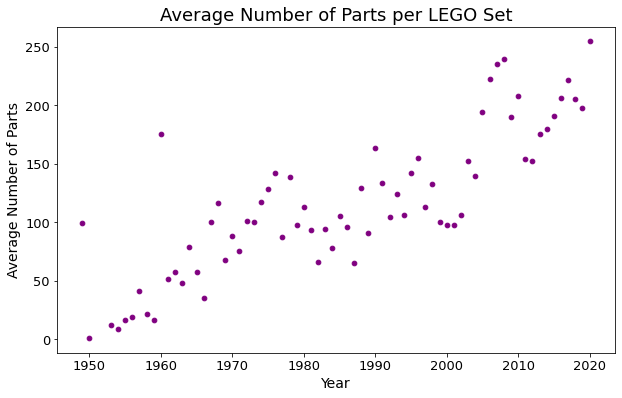

In [100]:
plt.figure(figsize=(10, 6))
plt.title("Average Number of Parts per LEGO Set", fontsize=18) 
plt.xticks(fontsize=13)
plt.xlabel("Year", fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Average Number of Parts", fontsize=14)
plt.scatter(parts_per_set_df.index[:-1], parts_per_set_df["mean parts"][:-1], color="purple", s=22)

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [101]:
# theme_id and the number of sets
set_theme_count_df = sets_df["theme_id"].value_counts()
set_theme_count_df.head()

501    906
158    766
494    425
435    381
503    373
Name: theme_id, dtype: int64

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src="assets/rebrickable_schema.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [109]:
themes_df = pd.read_csv("data/themes_20210210.csv", header=0, names=["id", "name", "parent_id"])

In [110]:
# confirm import
themes_df.describe()

,id,parent_id
count,598.000000,465.000000
mean,362.525084,306.167742
std,211.823601,198.422262
min,1.000000,1.000000
25%,161.250000,112.000000
50%,370.500000,324.000000
75%,545.750000,504.000000
max,713.000000,697.000000


In [111]:
themes_df.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [112]:
# Start Wars theme
themes_df[themes_df["name"] == "Star Wars"]

,id,name,parent_id
17,18,Star Wars,1.0
149,158,Star Wars,NaN
172,209,Star Wars,207.0
209,261,Star Wars,258.0


In [113]:
# look up a particular id in the sets dataframe
sets_df[sets_df["theme_id"] == 209]

,set_num,name,year,theme_id,num_parts
11496,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11529,75056-1,Star Wars Advent Calendar 2014,2014,209,275
11563,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11614,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11656,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11689,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11728,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11764,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12532,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14982,9509-1,Star Wars Advent Calendar 2012,2012,209,235


### Merging (i.e., Combining) DataFrames based on a Key


In [115]:
# updating the set_theme_count dataframe with column titles 
set_theme_count_df = pd.DataFrame({"id": set_theme_count_df.index, "set_count": set_theme_count_df.values})
set_theme_count_df.head()

,id,set_count
0,501,906
1,158,766
2,494,425
3,435,381
4,503,373


In [117]:
# merging dataframes on the "id" column
merged_df = pd.merge(set_theme_count_df, themes_df, on="id")
merged_df.head()

,id,set_count,name,parent_id
0,501,906,Gear,NaN
1,158,766,Star Wars,NaN
2,494,425,Friends,NaN
3,435,381,Ninjago,NaN
4,503,373,Key Chain,501.0


<BarContainer object of 10 artists>

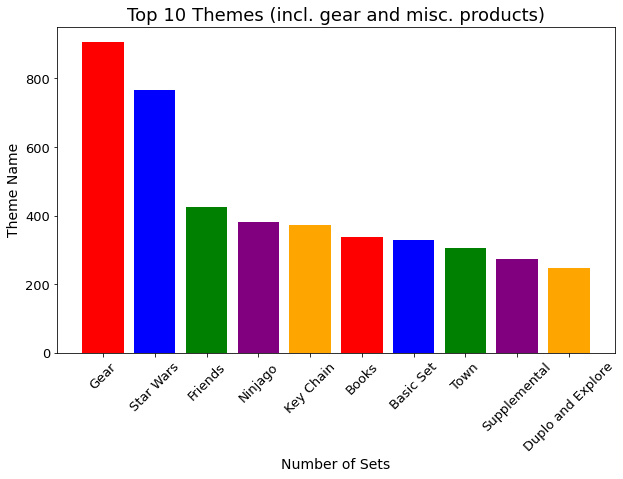

In [126]:
# bar chart of top 10 themes
plt.figure(figsize=(10, 6))
# seems to include several other "non-theme" bars too
plt.title("Top 10 Themes (incl. gear and misc. products)", fontsize=18) 
# rotate the text to make it readable
plt.xticks(fontsize=13, rotation=45)
plt.xlabel("Number of Sets", fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Theme Name", fontsize=14)
# list of colors to use, no particular meaning for their order
colors = ["red", "blue", "green", "purple", "orange", "red", "blue", "green", "purple", "orange"]
# only show the first 10
plt.bar(merged_df["name"][:10], merged_df["set_count"][:10], color=colors)

---